In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd '/content/drive/MyDrive/Colab Notebooks/finance/reg_merval'
!ls

/content/drive/MyDrive/Colab Notebooks/finance/reg_merval
'Datos históricos Futuros soja EE.UU..xlsx'   merval_reg.ipynb
 GGAL_bcba.xlsx				      riesgo_pais.xlsx
 GGAL_nasdaq.xlsx


*   Obtener los datos históricos del GGAl en BCBA. 
*   Cambiar nombre de columnas según conveniencia


*   Setear la columna 'date' como índice
Quedarse solo con la columna de utilidad borrando las demás

*   Quedarse solo con la columna de utilidad('last_merval') borrando las demás


In [22]:
df_ggal_bcba = pd.read_excel('GGAL_bcba.xlsx')
df_ggal_bcba.rename(columns={'Fecha':'date','Último':'last_ggal_bcba'}, inplace=True)
df_ggal_bcba.set_index('date', inplace=True)
df_ggal_bcba.drop(['Apertura','Máximo','Mínimo','Vol/','% var/'], axis=1, inplace=True)
df_ggal_bcba.tail()

,last_ggal_bcba
date,
2021-03-30,112.80
2021-03-31,111.25
2021-04-05,112.70
2021-04-06,116.35
2021-04-07,116.50


*   Obtener los datos históricos de GGAL en NASDAQ. 
*   Cambiar nombre de columnas según conveniencia


*   Setear la columna 'date' como índice
Quedarse solo con la columna de utilidad borrando las demás

*   Quedarse solo con la columna de utilidad('last_merval') borrando las demás


In [23]:
df_ggal_nasdaq = pd.read_excel('GGAL_nasdaq.xlsx')
df_ggal_nasdaq.rename(columns={'Fecha':'date','Último':'last_ggal_nasdaq'}, inplace=True)
df_ggal_nasdaq.set_index('date', inplace=True)
df_ggal_nasdaq.drop(['Apertura','Máximo','Mínimo','Vol/','% var/'], axis=1, inplace=True)
df_ggal_nasdaq.tail()

,last_ggal_nasdaq
date,
2020-06-04,10.18
2020-06-05,10.37
2020-06-08,11.50
2020-06-09,10.77
2020-06-10,10.86


*   Obtener los datos históricos del MERVAL. 
*   Cambiar nombre de columnas según conveniencia


*   Setear la columna 'date' como índice
Quedarse solo con la columna de utilidad borrando las demás

*   Quedarse solo con la columna de utilidad('last_merval') borrando las demás


In [30]:
df_merval = pd.read_excel('Merval.xlsx')
df_merval.rename(columns={'Fecha':'date','Último':'last_merval'}, inplace=True)
df_merval.set_index('date', inplace=True)
df_merval.drop(['Apertura','Máximo','Mínimo','Vol/','% var/'], axis=1, inplace=True)
df_merval.head()

,last_merval
date,
2000-01-03,551.83
2000-01-04,522.97
2000-01-05,532.68
2000-01-06,528.47
2000-01-07,522.12




*   Concatenar los 3 df anteriores en un solo df, teniendo en cuenta la fecha, con el parámetro join le indicamos que valores queremos (en este caso, devuelve los datos de las fechas que coinciden)
*   Se calcula el dólar CCL.


*   Se calcula el precio del merval en CCL
*   Y nos quedamos solo con el precio del merval CCL





In [35]:
df_merval_ccl = pd.concat([df_ggal_bcba,df_ggal_nasdaq,df_merval],axis=1,join='inner')
df_merval_ccl['ccl'] = (df_merval_ccl.last_ggal_bcba * 10) / df_merval_ccl.last_ggal_nasdaq
df_merval_ccl['merval_ccl'] = df_merval_ccl.last_merval / df_merval_ccl.ccl
df_merval_ccl.drop(['last_ggal_bcba','last_ggal_nasdaq','last_merval','ccl'],axis=1,inplace=True)
df_merval_ccl.tail()

,merval_ccl
date,
2020-05-04,279.870498
2020-05-05,275.889139
2020-05-06,285.313309
2020-05-07,298.688253
2020-05-08,311.466089


Repetimos los pasos de lo tres primeros df en la serie histórica de la soja Chicago.

In [15]:
df_soy = pd.read_excel('Datos históricos Futuros soja EE.UU..xlsx')
df_soy.rename(columns={'Fecha':'date', 'Último':'last_soy','% var-':'chg_pct_soy'}, inplace=True)
df_soy.set_index('date', inplace=True)
df_soy.drop(['Apertura','Máximo','Mínimo','Vol-','chg_pct_soy'], axis=1, inplace=True)
df_soy = df_soy[::-1]
df_soy.tail()

,last_soy
date,
2020-02-11,885.00
2020-02-12,892.00
2020-02-13,895.75
2020-02-14,892.88
2020-02-16,892.50


Repetimos el mismo procedimiento con el Riesgo país

In [16]:
df_embi = pd.read_excel('riesgo_pais.xlsx')
df_embi.rename(columns={'Fecha':'date','Puntos':'bp_embi'}, inplace=True)
df_embi.set_index('date',inplace=True)
df_embi = df_embi[::-1]
df_embi.tail()

,bp_embi
date,
2021-06-23,1532
2021-06-24,1556
2021-06-25,1573
2021-06-28,1587
2021-06-28,1587


Creamos un df con los datos del Merval CCL, precio de la soja y el riesgo país acorde a las fechas. En este caso, los datos son desde 02/01/2000 al 14/02/2020

In [59]:
df = pd.concat([df_embi,df_soy, df_merval_ccl],axis=1,join='inner')
df.tail()
print(df.iloc[0],df.iloc[len(df)-1])

bp_embi       792.000000
last_soy      495.000000
merval_ccl    454.545102
Name: 2001-01-02 00:00:00, dtype: float64 bp_embi       2014.000000
last_soy       892.880000
merval_ccl     455.514109
Name: 2020-02-14 00:00:00, dtype: float64




*   Separamos las varibles, para X sería el precio de la soja y el riesgo país y para Y el precio del merval en CCL
*   Separamos los datos en datos de entrenamiento y de prueba con una proporción de 80% de los datos para entrenamiento y 20% para la prueba.
*   Llamams a nuestro modelo de regresión lineal
*   Lo entrenamos a través del método .fit, colocando como argumento los datos de entrenamiento.

*   Le pedimos la efectividad del modelo con el método .score, en este caso particular se deberían mejorar los datos porque alrededror de solo el 35% de los nuevos datos que alimenten el aprendizaje les buscará una relación.







In [44]:
x = df[['bp_embi','last_soy']]
y = df['merval_ccl']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg.score(X_test,Y_test))

0.3533769369958222


<bound method Figure.show of <Figure size 1080x432 with 1 Axes>>

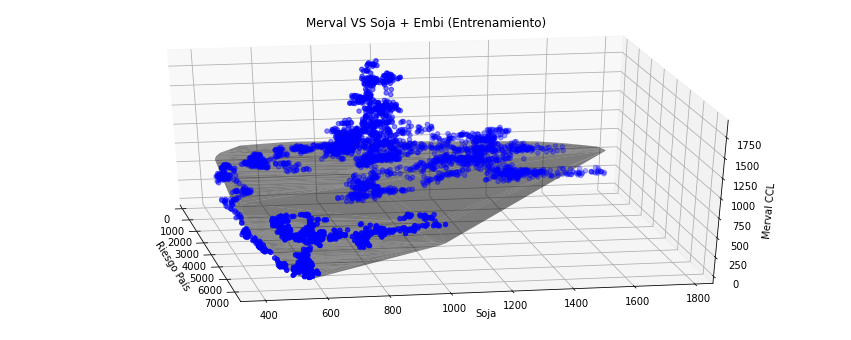

In [64]:
fig = plt.figure(figsize=(15,6))
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['bp_embi'],X_train['last_soy'], Y_train, color = 'blue')
viz_train.plot_trisurf(X_train['bp_embi'],X_train['last_soy'], reg.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Merval VS Soja + Embi (Entrenamiento)')
viz_train.set_xlabel('Riesgo País')
viz_train.set_ylabel('Soja')
viz_train.set_zlabel('Merval CCL')
viz_train.azim=-10
fig.show

<bound method Figure.show of <Figure size 1080x432 with 1 Axes>>

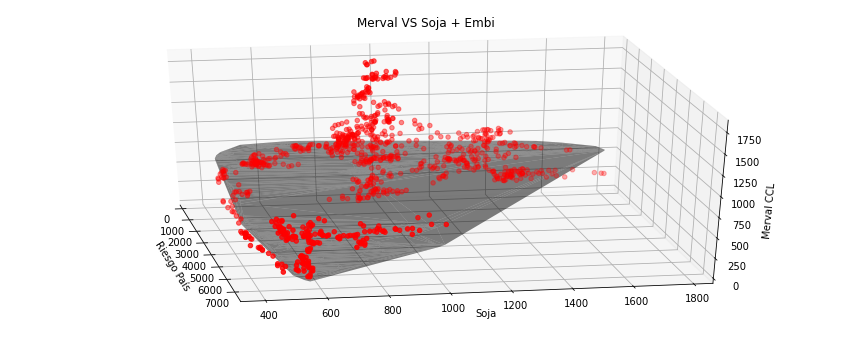

In [63]:
fig = plt.figure(figsize=(15,6))
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['bp_embi'],X_test['last_soy'], Y_test, color = 'red')
viz_train.plot_trisurf(X_train['bp_embi'], X_train['last_soy'], reg.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Merval VS Soja + Embi')
viz_train.set_xlabel('Riesgo País')
viz_train.set_ylabel('Soja')
viz_train.set_zlabel('Merval CCL')
viz_train.azim=-10
fig.show

In [67]:
print(f'La pendiente es: {reg.coef_}')
print(f'el bias es: {reg.intercept_}')
print(f'el coeficiente de determinación es: {reg.score(X_train, Y_train)}')

La pendiente es: [-0.10252631 -0.03075801]
el bias es: 829.6446953369452
el coeficiente de determinación es: 0.348193768860225


In [72]:
!echo "# Merval-Regression" >> README.md
!git init
!git config --global user.email "eliasdudamel@gmail.com"
!git config --global user.name "Elias"
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin git@github.com:Eliasedds/Merval-Regression.git
!git push -u origin main

Reinitialized existing Git repository in /content/drive/My Drive/Colab Notebooks/finance/reg_merval/.git/
[main fb89a3d] first commit
 1 file changed, 1 insertion(+)
fatal: remote origin already exists.
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
